# Capstone Project - The Battle of the Neighborhoods (Week 2)

## Applied Data Science Capstone by IBM/Coursera

# Table of contents

- <u><font color= "blue">Introduction: Business Problem</u></font>
- <u><font color= "blue">Data</u></font>
- <u><font color= "blue">Methodology</u></font>
- <u><font color= "blue">Analysis</u></font>
- <u><font color= "blue"> Results and Discussion</u></font>
- <u><font color= "blue">Conclusion</u></font>

# Introduction: Business Problem

## Introduction

**Tokyo**; The biggest city of Japan<br>
As of 2021, Tokyo has an estimated population of 13,960,236.<br>
Tokyo is the political and economic center of Japan.<br>
<br>
Business Problem<br>
**To open a restaurant**<br>
Neighborhood that is most likely to give a good business<br>

## Data

Neighbourhoods of Tokyo<br>
 Neighbourhoods of "**Special wards of Tokyo**" wikipedia page through data scraping.<br>
 Geographical coordinates of the neighbourhoods<br>
    Using Geopy library.<br>
　Venue data from Foursquare<br>
    Using Foursquare API<br>

## Preparation

In [1]:
!conda install -c conda-forge geopy --yes 
!conda install -c conda-forge folium=0.5.0 --yes
!pip install geocoder
!pip install beautifulsoup4
!pip install urlopen
!pip install --upgrade numpy

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |           1_llvm           5 KB  conda-forge
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    _pytorch_select-0.2        |            gpu_0           2 KB
    absl-py-0.13.0             |     pyhd8ed1ab_0          97 KB  conda-forge
    aiohttp-3.7.4.post0        |   py37h5e8e339_0         

pandas-1.3.0         | 12.7 MB   | ##################################### | 100% 
entrypoints-0.3      | 8 KB      | ##################################### | 100% 
dbus-1.13.6          | 572 KB    | ##################################### | 100% 
html5lib-1.1         | 89 KB     | ##################################### | 100% 
tornado-6.1          | 646 KB    | ##################################### | 100% 
dill-0.3.4           | 62 KB     | ##################################### | 100% 
prompt-toolkit-3.0.1 | 244 KB    | ##################################### | 100% 
brotli-1.0.9         | 17 KB     | ##################################### | 100% 
cryptography-3.4.7   | 1.1 MB    | ##################################### | 100% 
ca-certificates-2021 | 136 KB    | ##################################### | 100% 
snowballstemmer-2.1. | 57 KB     | ##################################### | 100% 
krb5-1.19.1          | 1.4 MB    | ##################################### | 100% 
llvm-openmp-12.0.1   | 2.8 M

mkl_random-1.2.0     | 313 KB    | ##################################### | 100% 
libgcc-ng-9.3.0      | 7.8 MB    | ##################################### | 100% 
retrying-1.3.3       | 11 KB     | ##################################### | 100% 
pyqtchart-5.12       | 256 KB    | ##################################### | 100% 
libwebp-base-1.2.0   | 815 KB    | ##################################### | 100% 
nest-asyncio-1.5.1   | 9 KB      | ##################################### | 100% 
webencodings-0.5.1   | 12 KB     | ##################################### | 100% 
certifi-2021.5.30    | 141 KB    | ##################################### | 100% 
cffi-1.14.6          | 225 KB    | ##################################### | 100% 
lcms2-2.12           | 443 KB    | ##################################### | 100% 
cx_oracle-8.2.1      | 199 KB    | ##################################### | 100% 
xlrd-2.0.1           | 92 KB     | ##################################### | 100% 
icu-68.1             | 13.0 

In [2]:
!pip install -U numpy
!pip install -U pandas
!pip install -U scipy
!pip install -U scikit-learn
!pip install -U imbalanced-learn

     |████████████████████████████████| 28.5 MB 11.6 MB/s eta 0:00:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.3
    Uninstalling scipy-1.5.3:
      Successfully uninstalled scipy-1.5.3
     |████████████████████████████████| 206 kB 17.8 MB/s eta 0:00:01


In [103]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
from geopy.geocoders import Nominatim 
import requests 
from pandas.io.json import json_normalize 
import folium 
from bs4 import BeautifulSoup
import csv
import geocoder 
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
from bs4 import BeautifulSoup
import csv
from urllib.request import urlopen
import os

In [62]:
from sklearn.cluster import KMeans

## Web scaraping

Web Scraping by **Beautiful Soup**.<BR>
   Target:<u><font color= "blue">https://en.wikipedia.org/wiki/Special_wards_of_Tokyo</u></font>

In [63]:
html = urlopen("https://en.wikipedia.org/wiki/Special_wards_of_Tokyo")
html_parser = BeautifulSoup(html, "html.parser")

In [64]:
os.chdir('/tmp')
path = 'tokyo.csv'
csv_file = open(path, 'w')
csv_writer = csv.writer(csv_file)

In [65]:
table = html_parser.findAll("table", {"class":"wikitable sortable"})[0]
rows = table.findAll("tr")

with open("tokyo.csv", "w", encoding='utf-8') as file:
    writer = csv.writer(file)
    for row in rows:
        csvRow = []
        for cell in row.findAll(['td', 'th']):
            csvRow.append(cell.get_text())
        writer.writerow(csvRow)

In [66]:
csv_file.close()

In [67]:
tokyo_data = pd.read_csv('tokyo.csv')

In [68]:
tokyo_data.shape

(24, 8)

In [69]:
tokyo_data = tokyo_data[["Name\n"]]

In [70]:
tokyo_ward = tokyo_data.drop(23)
tokyo_ward = tokyo_ward.rename(columns={'Name\n': 'Neighbourhood'})
tokyo_ward

,Neighbourhood
0,Chiyoda
1,Chūō
2,Minato
3,Shinjuku
4,Bunkyō
5,Taitō
6,Sumida
7,Kōtō
8,Shinagawa
9,Meguro


## Geocoder

Getting latitude and longitude by **geocoder**.<BR>
Plotting of wards(Neighbourhood) of Tokyo by **Folium**.

In [71]:
lat = []
lng = []
lat_lng_coords = None

neighbourhoods = tokyo_ward['Neighbourhood']

for nh in neighbourhoods:
    g = geocoder.arcgis('{}, Tokyo, JP'.format(nh))
    lat_lng_coords = g.latlng
    lat.append(lat_lng_coords[0])
    lng.append(lat_lng_coords[1])

In [72]:
tokyo_geo =  tokyo_ward
tokyo_geo['Latitude'] = lat
tokyo_geo['Longitude'] = lng

In [73]:
tokyo_geo.head()

,Neighbourhood,Latitude,Longitude
0,Chiyoda,35.693930,139.753711
1,Chūō,35.670572,139.771988
2,Minato,35.658017,139.751546
3,Shinjuku,35.693798,139.703440
4,Bunkyō,35.707595,139.752210


# Foursquare

Getting Venu imformation by **Foursquare** API.<BR>

CLIENT_ID = '5IPRQVLM2TWU4BSGCUIXQF1W35EYULBNCNZC0AXHRDTI5MTQ'
CLIENT_SECRET = 'W2RQZ4JYWFLJQ2RCSMFGHUZQRABNPWEX43LD3VIKSXKWAYD1'
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [81]:
CLIENT_ID = '5IPRQVLM2TWU4BSGCUIXQF1W35EYULBNCNZC0AXHRDTI5MTQ'
CLIENT_SECRET = 'W2RQZ4JYWFLJQ2RCSMFGHUZQRABNPWEX43LD3VIKSXKWAYD1'
VERSION = '20180605'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5IPRQVLM2TWU4BSGCUIXQF1W35EYULBNCNZC0AXHRDTI5MTQ
CLIENT_SECRET:W2RQZ4JYWFLJQ2RCSMFGHUZQRABNPWEX43LD3VIKSXKWAYD1


In [86]:
from geopy.geocoders import Nominatim

address = 'Tokyo, JP'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Tokyo are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Tokyo are 35.6828387, 139.7594549.


In [87]:
tokyo_map = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(tokyo_geo['Latitude'], tokyo_geo['Longitude'], tokyo_geo['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(tokyo_map)  
    
tokyo_map

## Data processing

 Data processing & Tabulation by **pandas**.<BR>
 Making the Top 10 of the venue categories every each ward.<BR>
 One hot encoding by get_dummies(**pandas**)

In [88]:
def get_category_type(row):
    categories_list = row['Category']  
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [89]:
explore_df_list = []
for i, nhood_name in enumerate(tokyo_geo['Neighbourhood']):  
    try :
        nhood_name = tokyo_geo.loc[i, 'Neighbourhood']
        nhood_lat = tokyo_geo.loc[i, 'Latitude']
        nhood_lng = tokyo_geo.loc[i, 'Longitude']

        radius = 1000 
        LIMIT = 30 

        url = 'https://api.foursquare.com/v2/venues/explore?client_id={} \
        &client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, nhood_lat, nhood_lng, VERSION, radius, LIMIT)

        results = json.loads(requests.get(url).text)
        results = results['response']['groups'][0]['items']

        nearby = json_normalize(results)
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        nearby = nearby.loc[:, filtered_columns]

        columns = ['Name', 'Category', 'Latitude', 'Longitude']
        nearby.columns = columns

        nearby['Category'] = nearby.apply(get_category_type, axis=1)    

        for i, name in enumerate(nearby['Name']):
            s_list = nearby.loc[i, :].values.tolist() 
            f_list = [nhood_name, nhood_lat, nhood_lng] + s_list
            explore_df_list.append(f_list)
    
    except Exception as e:
        pass

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:18: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [90]:
explore_tokyo = pd.DataFrame([item for item in explore_df_list])

In [91]:
explore_tokyo.columns = ['Neighbourhood', 'Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue Name', 'Venue Category', 'Venue Latitude', 'Venue Longitude']

In [92]:
explore_tokyo.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude
0,Chiyoda,35.69393,139.753711,Kanda Tendonya (神田天丼家),Tempura Restaurant,35.695765,139.754682
1,Chiyoda,35.69393,139.753711,Bondy (欧風カレー ボンディ),Japanese Curry Restaurant,35.695544,139.757356
2,Chiyoda,35.69393,139.753711,Jimbocho Kurosu (神保町 黒須),Ramen Restaurant,35.695539,139.754851
3,Chiyoda,35.69393,139.753711,National Museum of Modern Art (東京国立近代美術館),Art Museum,35.690541,139.754694
4,Chiyoda,35.69393,139.753711,Warayakiya (わらやき屋),Sake Bar,35.696017,139.751388


In [93]:
tokyo_1hot = pd.get_dummies(explore_tokyo[['Venue Category']], prefix="", prefix_sep="")
tokyo_1hot['Neighbourhood'] = explore_tokyo['Neighbourhood'] 
fixed_columns = [tokyo_1hot.columns[-1]] + tokyo_1hot.columns[:-1].values.tolist()
tokyo_1hot = tokyo_1hot[fixed_columns]
tokyo_1hot.head()

,Neighbourhood,African Restaurant,American Restaurant,Arcade,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Baseball Stadium,Bath House,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Boarding House,Bookstore,Brazilian Restaurant,Brewery,Buddhist Temple,Buffet,Burger Joint,Butcher,Café,Camera Store,Candy Store,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cultural Center,Cupcake Shop,Deli / Bodega,Dessert Shop,Discount Store,Dive Shop,Donburi Restaurant,Drugstore,Dumpling Restaurant,Electronics Store,Escape Room,Event Space,Factory,Falafel Restaurant,Fast Food Restaurant,Fish Market,Food & Drink Shop,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,German Restaurant,Grocery Store,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Heliport,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hot Spring,Hotel,Hotel Bar,Hotpot Restaurant,Imported Food Shop,Indian Restaurant,Indie Theater,Italian Restaurant,Japanese Curry Restaurant,Japanese Family Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kaiseki Restaurant,Liquor Store,Lounge,Martial Arts School,Mexican Restaurant,Monument / Landmark,Motorcycle Shop,Multiplex,Museum,Music Venue,Nabe Restaurant,Noodle House,Outdoor Supply Store,Paper / Office Supplies Store,Park,Pastry Shop,Pizza Place,Port,Pub,Ramen Restaurant,Record Shop,Restaurant,Rock Club,Roller Rink,Russian Restaurant,Sake Bar,Salad Place,Sandwich Place,Sauna / Steam Room,Scenic Lookout,Science Museum,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shopping Mall,Shopping Plaza,Smoke Shop,Soba Restaurant,Soup Place,South Indian Restaurant,Spa,Spanish Restaurant,Stadium,Steakhouse,Sukiyaki Restaurant,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Takoyaki Place,Tea Room,Teishoku Restaurant,Tempura Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Tonkatsu Restaurant,Tourist Information Center,Toy / Game Store,Trail,Train Station,Udon Restaurant,Unagi Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wagashi Place,Wine Bar,Wine Shop,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant,Zoo
0,Chiyoda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Chiyoda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Chiyoda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Chiyoda,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chiyoda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [94]:
tokyo_grouped = tokyo_1hot.groupby('Neighbourhood').mean().reset_index()
tokyo_grouped.head()

,Neighbourhood,African Restaurant,American Restaurant,Arcade,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Baseball Stadium,Bath House,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Boarding House,Bookstore,Brazilian Restaurant,Brewery,Buddhist Temple,Buffet,Burger Joint,Butcher,Café,Camera Store,Candy Store,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cultural Center,Cupcake Shop,Deli / Bodega,Dessert Shop,Discount Store,Dive Shop,Donburi Restaurant,Drugstore,Dumpling Restaurant,Electronics Store,Escape Room,Event Space,Factory,Falafel Restaurant,Fast Food Restaurant,Fish Market,Food & Drink Shop,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,German Restaurant,Grocery Store,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Heliport,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hot Spring,Hotel,Hotel Bar,Hotpot Restaurant,Imported Food Shop,Indian Restaurant,Indie Theater,Italian Restaurant,Japanese Curry Restaurant,Japanese Family Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kaiseki Restaurant,Liquor Store,Lounge,Martial Arts School,Mexican Restaurant,Monument / Landmark,Motorcycle Shop,Multiplex,Museum,Music Venue,Nabe Restaurant,Noodle House,Outdoor Supply Store,Paper / Office Supplies Store,Park,Pastry Shop,Pizza Place,Port,Pub,Ramen Restaurant,Record Shop,Restaurant,Rock Club,Roller Rink,Russian Restaurant,Sake Bar,Salad Place,Sandwich Place,Sauna / Steam Room,Scenic Lookout,Science Museum,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shopping Mall,Shopping Plaza,Smoke Shop,Soba Restaurant,Soup Place,South Indian Restaurant,Spa,Spanish Restaurant,Stadium,Steakhouse,Sukiyaki Restaurant,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Takoyaki Place,Tea Room,Teishoku Restaurant,Tempura Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Tonkatsu Restaurant,Tourist Information Center,Toy / Game Store,Trail,Train Station,Udon Restaurant,Unagi Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wagashi Place,Wine Bar,Wine Shop,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant,Zoo
0,Adachi,0.0,0.0,0.0,0.000000,0.0,0.0,0.066667,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.033333,0.0,0.0,0.0,0.000000,0.000000,0.0,0.233333,0.0,0.0,0.000000,0.0,0.100000,0.0,0.033333,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.000000,0.0,0.000000,0.000000,0.066667,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.033333,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.033333,0.0,0.000000,0.0,0.0,0.033333,0.000000,0.0,0.033333,0.033333,0.033333,0.0,0.0,0.033333,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.033333,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.100000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1,Arakawa,0.0,0.0,0.0,0.000000,0.0,0.0,0.066667,0.033333,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.033333,0.0,0.033333,0.0,0.0,0.033333,0.0,0.0,0.0,0.000000,0.000000,0.0,0.033333,0.0,0.0,0.033333,0.0,0.033333,0.0,0.000000,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.066667,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.033333,0.033333,0.000000,0.0,0.066667,0.0,0.000000,0.0,0.033333,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.033333,0.000000,0.0,0.066667,0.000000,0.000000,0.0,0.0,0.133333,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.033333,0.0,0.000000,0.0,0.000000,0.0,0.0,0.033333,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.

In [95]:
def top_common_venues(row, top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_venues]

In [104]:
top_venues = 10
indicators = ['st', 'nd', 'rd']

columns = ['Neighbourhood']
for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = tokyo_grouped['Neighbourhood']

for ind in np.arange(tokyo_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = top_common_venues(tokyo_grouped.iloc[ind, :], top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adachi,Convenience Store,Supermarket,Discount Store,Drugstore,Grocery Store,BBQ Joint,Noodle House,Ramen Restaurant,Furniture / Home Store,Pizza Place
1,Arakawa,Ramen Restaurant,Park,BBQ Joint,Supermarket,Japanese Restaurant,Grocery Store,Drugstore,Sandwich Place,Discount Store,Deli / Bodega
2,Bunkyō,Hotel,Baseball Stadium,Martial Arts School,Supermarket,Café,Seafood Restaurant,Pastry Shop,Chinese Restaurant,History Museum,Ramen Restaurant
3,Chiyoda,Café,Ramen Restaurant,Japanese Curry Restaurant,BBQ Joint,Sushi Restaurant,Tea Room,Coffee Shop,Comedy Club,Historic Site,Sake Bar
4,Chūō,Ramen Restaurant,Soba Restaurant,Italian Restaurant,Tonkatsu Restaurant,Sushi Restaurant,Coffee Shop,Yoshoku Restaurant,Juice Bar,Steakhouse,Burger Joint


## Methodology

 Unsupervised Learning<BR>
  Clustering by **K-Means**.<BR>
The suitable number of clusters with the **elbow method** is 4.<BR>
Vidualization of cluster by **Folium**.

In [105]:
tokyo_grouped_clustering = tokyo_grouped.drop('Neighbourhood', 1)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


In [106]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [107]:
max_range = 15

from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for tokyo_clusters in range(2, max_range) :
    
    tokyo_gc = tokyo_grouped_clustering
    kmeans = KMeans(n_clusters = tokyo_clusters, init = 'k-means++', random_state = 0).fit_predict(tokyo_gc)
    
    score = silhouette_score(tokyo_gc, kmeans)

    indices.append(tokyo_clusters)
    scores.append(score)

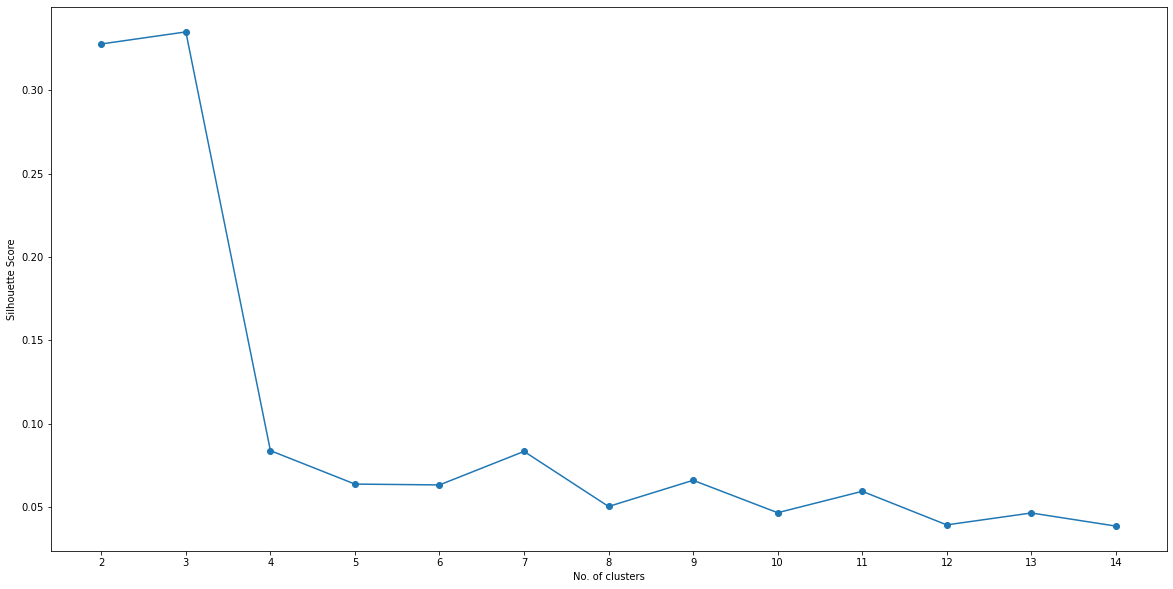

In [54]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [108]:
opt_value = 8

In [109]:
tokyo_clusters = opt_value

tokyo_gc = tokyo_grouped_clustering
kmeans = KMeans(n_clusters = tokyo_clusters, init = 'k-means++', random_state = 0).fit(tokyo_gc)

In [110]:
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [112]:
tokyo_final = tokyo_geo
tokyo_final = tokyo_final.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
tokyo_final.dropna(inplace = True)
tokyo_final['Cluster Labels'] = tokyo_final['Cluster Labels'].astype(int)
tokyo_final.head()

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chiyoda,35.693930,139.753711,0,Café,Ramen Restaurant,Japanese Curry Restaurant,BBQ Joint,Sushi Restaurant,Tea Room,Coffee Shop,Comedy Club,Historic Site,Sake Bar
1,Chūō,35.670572,139.771988,3,Ramen Restaurant,Soba Restaurant,Italian Restaurant,Tonkatsu Restaurant,Sushi Restaurant,Coffee Shop,Yoshoku Restaurant,Juice Bar,Steakhouse,Burger Joint
2,Minato,35.658017,139.751546,3,Japanese Restaurant,Ramen Restaurant,Historic Site,BBQ Joint,Tonkatsu Restaurant,Liquor Store,Buddhist Temple,Scenic Lookout,Soba Restaurant,Kaiseki Restaurant
3,Shinjuku,35.693798,139.703440,7,Bar,Sake Bar,Yakitori Restaurant,Thai Restaurant,Lounge,Clothing Store,Chinese Restaurant,Pub,Dessert Shop,Pizza Place
4,Bunkyō,35.707595,139.752210,1,Hotel,Baseball Stadium,Martial Arts School,Supermarket,Café,Seafood Restaurant,Pastry Shop,Chinese Restaurant,History Museum,Ramen Restaurant


In [113]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(tokyo_clusters)
ys = [i + x + (i*x)**2 for i in range(tokyo_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(tokyo_final['Latitude'], tokyo_final['Longitude'], tokyo_final['Neighbourhood'], 
                                  tokyo_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
    map_clusters.add_child(
        folium.features.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))
       
map_clusters

## Analysis

Examining each cluster.

In [114]:
val = 1
tokyo_final.loc[tokyo_final['Cluster Labels'] == (val - 1), tokyo_final.columns[[0] + np.arange(4, tokyo_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chiyoda,Café,Ramen Restaurant,Japanese Curry Restaurant,BBQ Joint,Sushi Restaurant,Tea Room,Coffee Shop,Comedy Club,Historic Site,Sake Bar
12,Shibuya,Café,Record Shop,Bookstore,Donburi Restaurant,Chinese Restaurant,Cocktail Bar,Tea Room,Comedy Club,Concert Hall,African Restaurant


In [115]:
val = 2
tokyo_final.loc[tokyo_final['Cluster Labels'] == (val - 1), tokyo_final.columns[[0] + np.arange(4, tokyo_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Bunkyō,Hotel,Baseball Stadium,Martial Arts School,Supermarket,Café,Seafood Restaurant,Pastry Shop,Chinese Restaurant,History Museum,Ramen Restaurant
10,OtaŌta,Hotel,Italian Restaurant,Hotel Bar,Scenic Lookout,Chinese Restaurant,Cocktail Bar,Café,Soba Restaurant,Tonkatsu Restaurant,American Restaurant


In [116]:
val = 3
tokyo_final.loc[tokyo_final['Cluster Labels'] == (val - 1), tokyo_final.columns[[0] + np.arange(4, tokyo_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Edogawa,Convenience Store,Grocery Store,Donburi Restaurant,Unagi Restaurant,Chinese Restaurant,Clothing Store,Ramen Restaurant,Pizza Place,Furniture / Home Store,Cultural Center


In [117]:
val = 4
tokyo_final.loc[tokyo_final['Cluster Labels'] == (val - 1), tokyo_final.columns[[0] + np.arange(4, tokyo_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chūō,Ramen Restaurant,Soba Restaurant,Italian Restaurant,Tonkatsu Restaurant,Sushi Restaurant,Coffee Shop,Yoshoku Restaurant,Juice Bar,Steakhouse,Burger Joint
2,Minato,Japanese Restaurant,Ramen Restaurant,Historic Site,BBQ Joint,Tonkatsu Restaurant,Liquor Store,Buddhist Temple,Scenic Lookout,Soba Restaurant,Kaiseki Restaurant
6,Sumida,Japanese Restaurant,Café,Ramen Restaurant,Sukiyaki Restaurant,Soba Restaurant,Bakery,Unagi Restaurant,Park,Deli / Bodega,Buddhist Temple
7,Kōtō,Ramen Restaurant,Café,French Restaurant,BBQ Joint,Convenience Store,Park,Climbing Gym,Discount Store,Tonkatsu Restaurant,Hotel
11,Setagaya,Ramen Restaurant,Soba Restaurant,Sake Bar,Japanese Restaurant,Café,Candy Store,Indian Restaurant,Supermarket,Cupcake Shop,Szechuan Restaurant
14,Suginami,Ramen Restaurant,Sake Bar,BBQ Joint,Thai Restaurant,Wagashi Place,Café,Italian Restaurant,Imported Food Shop,Music Venue,Indian Restaurant
16,Kita,Ramen Restaurant,Café,Park,Sake Bar,Museum,Theater,Drugstore,Fried Chicken Joint,Garden,Convenience Store
17,Arakawa,Ramen Restaurant,Park,BBQ Joint,Supermarket,Japanese Restaurant,Grocery Store,Drugstore,Sandwich Place,Discount Store,Deli / Bodega
18,Itabashi,Ramen Restaurant,Sake Bar,Yoshoku Restaurant,Café,Steakhouse,Udon Restaurant,French Restaurant,Deli / Bodega,Sushi Restaurant,Coffee Shop


In [118]:
val = 5
tokyo_final.loc[tokyo_final['Cluster Labels'] == (val - 1), tokyo_final.columns[[0] + np.arange(4, tokyo_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Taitō,Sake Bar,Ramen Restaurant,Cocktail Bar,Science Museum,Soba Restaurant,Italian Restaurant,Supermarket,Steakhouse,Toy / Game Store,Chinese Restaurant
8,Shinagawa,Ramen Restaurant,Sake Bar,Theater,Steakhouse,Restaurant,Cocktail Bar,Thai Restaurant,Gastropub,Pizza Place,Tonkatsu Restaurant
19,Nerima,Ramen Restaurant,Sake Bar,Chinese Restaurant,BBQ Joint,Soba Restaurant,Grocery Store,Coffee Shop,South Indian Restaurant,Garden Center,Stadium
21,Katsushika,Sake Bar,Discount Store,Italian Restaurant,Sushi Restaurant,Takoyaki Place,Drugstore,Train Station,Dumpling Restaurant,Supermarket,Concert Hall


In [119]:
val = 6
tokyo_final.loc[tokyo_final['Cluster Labels'] == (val - 1), tokyo_final.columns[[0] + np.arange(4, tokyo_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,Adachi,Convenience Store,Supermarket,Discount Store,Drugstore,Grocery Store,BBQ Joint,Noodle House,Ramen Restaurant,Furniture / Home Store,Pizza Place


In [120]:
val = 7
tokyo_final.loc[tokyo_final['Cluster Labels'] == (val - 1), tokyo_final.columns[[0] + np.arange(4, tokyo_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Toshima,Supermarket,Boarding House,Harbor / Marina,Heliport,History Museum,Port,Dive Shop,Scenic Lookout,Science Museum,Ramen Restaurant


In [121]:
val = 8
tokyo_final.loc[tokyo_final['Cluster Labels'] == (val - 1), tokyo_final.columns[[0] + np.arange(4, tokyo_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Shinjuku,Bar,Sake Bar,Yakitori Restaurant,Thai Restaurant,Lounge,Clothing Store,Chinese Restaurant,Pub,Dessert Shop,Pizza Place
9,Meguro,BBQ Joint,Coffee Shop,Yakitori Restaurant,Japanese Restaurant,Chinese Restaurant,Thai Restaurant,Café,Paper / Office Supplies Store,French Restaurant,Sake Bar
13,Nakano,BBQ Joint,Bookstore,Ramen Restaurant,Yakitori Restaurant,Seafood Restaurant,Japanese Restaurant,Noodle House,Coffee Shop,Hookah Bar,Sake Bar


## Discussion

Closely examining the contents(Top 10 categories of the restaurant business) of each cluster, it is clear between eight clusters that a big difference exists.<BR>
 ****Cluster 4** is thought to be the most appropriate place to open the restaurant business because there are many restaurant categories in the Neighbourhood.<BR>
 Especially, **Chuo** and **Shinjuku**, These wards are populous areas in cluster 4, look like good locations for open a new resturant.

## Conslution

Web Scraping by Beautiful Soup is very helpful to gather data for data analysis. But there seems to be lots of websites that it is hard to do **webscraping**.<BR>
 Web API such as Foursquare is very valuable for data scientist. It is very easy and effective to extract data that they have.<BR>
 Also, data analysys and machine learning by python can be very helpful in determining solutions of certain business problems, **Python's inbuilt libraries**  such as Pandas, Geopy, Folium make it very simple for data scientist to develop programs. Abobe all, sklearn.cluster is very helpful for me to develop statistics programs.
 I had a hard time to solve errors by the **version difference** of libraries.<BR>
 I felt the need of performing **enough preparations** including the learning about the necessary library before programming. <BR>
    Do not program it immediately, We Should take time to prepare.